#Начальная корректировка данных

In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df=pd.read_csv('homework.csv')
df

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,111649,consideration,150000,NaN,Android,video,0.75
1,108759,interest,150000,NaN,Android,banner,0.50
2,991236,interest,150000,NaN,Android,native,2.00
3,387356,INTEREST,150000,NaN,iOS,search,1.50
4,619571,CONSIDERATION,150000,NaN,iOS,search,1.50
...,...,...,...,...,...,...,...
3845702,929180,INTENT,224682,NaN,iOS,search,1.50
3845703,1034498,INTENT,225430,NaN,iOS,search,1.50
3845704,947521,consideration,225482,NaN,Android,organic,0.00
3845705,720354,purchase,225495,50.0,Android,organic,0.00


In [49]:
df['funnel_stage'] = df['funnel_stage'].apply(lambda x: x.lower())
df['funnel_stage'].value_counts()

funnel_stage
interest         3219813
consideration     340106
intent            280911
purchase            4877
Name: count, dtype: int64

In [50]:
df['profit'] = df['profit'].fillna(0)

#Число уникальных пользователей по каналам в разрезе этапов воронки

In [51]:
order = ['interest', 'consideration', 'intent', 'purchase']
df['funnel_stage'] = pd.Categorical(df['funnel_stage'], categories=order, ordered=True)
df_sorted = df.sort_values('funnel_stage')
grouped_df = df_sorted.groupby(['ad_channel', 'funnel_stage'])['user_id'].nunique()
pd.DataFrame(grouped_df)

user_id
ad_channel      funnel_stage          
banner          interest         92003
                consideration    47541
                intent            7625
                purchase           688
native          interest         19381
                consideration    12597
                intent             412
                purchase            37
organic         interest         78707
                consideration    53592
                intent            9163
                purchase           542
other           interest          3216
                consideration     1813
                intent             232
                purchase            43
partner_network interest         66234
                consideration    24721
                intent            4420
                purchase           450
rich            interest          8922
                consideration     4657
                intent            1238
                purchase            22
search          interest        224668
                consideration   134305
                intent           27481
                purchase          3090
video           interest         97961
                consideration    60880
                intent              58
                purchase             5

#Работа с фальсификациями

C:\Users\Danil\AppData\Local\Temp\ipykernel_15972\1748587712.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gr_df)


<Axes: ylabel='Density'>

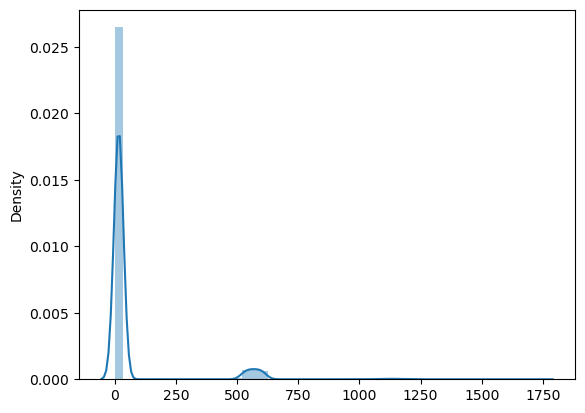

In [52]:
gr_df = df.groupby(['timestamp']).size()
sns.distplot(gr_df)

In [53]:
gr_df

timestamp
150000    16
150001     9
150002    11
150003    15
150004    10
          ..
224682     1
225430     1
225482     1
225495     1
225688     1
Length: 60736, dtype: int64

In [54]:
gr_df.describe()


count    60736.000000
mean        63.318411
std        163.342578
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max       1735.000000
dtype: float64

In [55]:
q75, q25 = np.percentile(gr_df, [75,25])

In [56]:
print(f'q75={q75}, q25={q25}')

q75=22.0, q25=13.0


In [57]:
outliers = gr_df.apply(lambda x: x if x>q75 else None)
outliers = outliers.dropna()
outliers

timestamp
150029     607.0
150074     589.0
150081    1098.0
150111     543.0
150126     532.0
           ...  
213008     521.0
214121     585.0
214849     558.0
216517     529.0
217701     582.0
Length: 14861, dtype: float64

In [58]:
id_remove = outliers.index.tolist()


In [59]:
df_new = df[~df['timestamp'].isin(id_remove)]
df_new

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,111649,consideration,150000,0.0,Android,video,0.75
1,108759,interest,150000,0.0,Android,banner,0.50
2,991236,interest,150000,0.0,Android,native,2.00
3,387356,interest,150000,0.0,iOS,search,1.50
4,619571,consideration,150000,0.0,iOS,search,1.50
...,...,...,...,...,...,...,...
3845702,929180,intent,224682,0.0,iOS,search,1.50
3845703,1034498,intent,225430,0.0,iOS,search,1.50
3845704,947521,consideration,225482,0.0,Android,organic,0.00
3845705,720354,purchase,225495,50.0,Android,organic,0.00


In [60]:
df_new.timestamp.value_counts().describe()

count    45875.000000
mean        14.031477
std          6.437228
min          1.000000
25%         10.000000
50%         16.000000
75%         19.000000
max         22.000000
Name: count, dtype: float64

#Гистограмма числа действий, совершаемых пользователями в один момент времени

<Axes: xlabel='timestamp', ylabel='Count'>

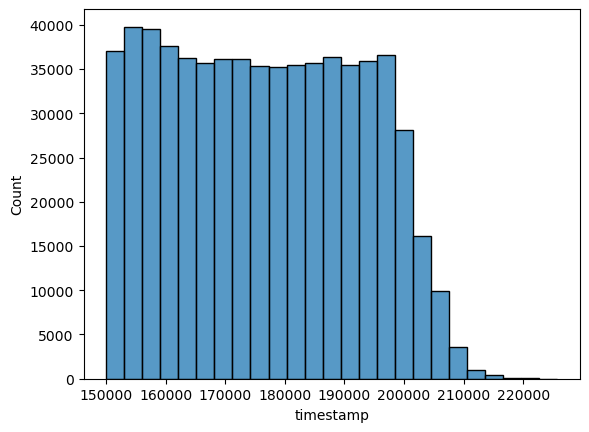

In [61]:
sns.histplot(df_new.timestamp, bins=25)

#Процент фродовых пользователей от общего числа

In [62]:
all_count = df.shape[0]
frod_count = outliers.shape[0]
print(f'Процент фродовых пользователей от общего числа: {frod_count/all_count}')

Процент фродовых пользователей от общего числа: 0.00386430895541444


In [63]:
frod_table = df[df['timestamp'].isin(id_remove)]
frod_table

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
373,910643,interest,150029,0.0,Android,search,1.5
374,910643,interest,150029,0.0,Android,search,1.5
375,910643,interest,150029,0.0,iOS,search,1.5
376,910643,interest,150029,0.0,iOS,search,1.5
377,910643,interest,150029,0.0,iOS,search,1.5
...,...,...,...,...,...,...,...
3845612,153440,intent,217701,0.0,Android,organic,0.0
3845613,153440,intent,217701,0.0,Android,organic,0.0
3845614,153440,intent,217701,0.0,Android,organic,0.0
3845615,153440,intent,217701,0.0,Android,organic,0.0


In [64]:
#frod_table.to_csv('frod_table.csv', index=False)

#Модуль 9

##Преобразование категориальных признаков

###Преобразование признака операционной системы

In [65]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

In [66]:
os_data = df_new[['os']]

In [67]:
ohe = OneHotEncoder(sparse=False)

In [68]:
enc_os_data = ohe.fit_transform(os_data)

C:\Users\Danil\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [69]:
df_new[ohe.get_feature_names_out()] = enc_os_data
df_new

C:\Users\Danil\AppData\Local\Temp\ipykernel_15972\4273702362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[ohe.get_feature_names_out()] = enc_os_data
C:\Users\Danil\AppData\Local\Temp\ipykernel_15972\4273702362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[ohe.get_feature_names_out()] = enc_os_data


,user_id,funnel_stage,timestamp,profit,os,ad_channel,price,os_Android,os_iOS
0,111649,consideration,150000,0.0,Android,video,0.75,1.0,0.0
1,108759,interest,150000,0.0,Android,banner,0.50,1.0,0.0
2,991236,interest,150000,0.0,Android,native,2.00,1.0,0.0
3,387356,interest,150000,0.0,iOS,search,1.50,0.0,1.0
4,619571,consideration,150000,0.0,iOS,search,1.50,0.0,1.0
...,...,...,...,...,...,...,...,...,...
3845702,929180,intent,224682,0.0,iOS,search,1.50,0.0,1.0
3845703,1034498,intent,225430,0.0,iOS,search,1.50,0.0,1.0
3845704,947521,consideration,225482,0.0,Android,organic,0.00,1.0,0.0
3845705,720354,purchase,225495,50.0,Android,organic,0.00,1.0,0.0


###Преобразование признака этапа воронки продаж

In [70]:
stage_mapping = {'interest' : 0.0, 'consideration' : 1.0, 'intent' : 2.0, 'purchase' : 3.0}

In [71]:
stage_data = df_new['funnel_stage']

In [72]:
enc_stage_data = [stage_mapping[stage] for stage in stage_data]
df_new['funnel_stage_enc'] = enc_stage_data
df_new.head()

C:\Users\Danil\AppData\Local\Temp\ipykernel_15972\3784887318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['funnel_stage_enc'] = enc_stage_data


,user_id,funnel_stage,timestamp,profit,os,ad_channel,price,os_Android,os_iOS,funnel_stage_enc
0,111649,consideration,150000,0.0,Android,video,0.75,1.0,0.0,1.0
1,108759,interest,150000,0.0,Android,banner,0.50,1.0,0.0,0.0
2,991236,interest,150000,0.0,Android,native,2.00,1.0,0.0,0.0
3,387356,interest,150000,0.0,iOS,search,1.50,0.0,1.0,0.0
4,619571,consideration,150000,0.0,iOS,search,1.50,0.0,1.0,1.0


In [73]:
df_new = df_new.drop(columns=['funnel_stage', 'os'])
df_new

,user_id,timestamp,profit,ad_channel,price,os_Android,os_iOS,funnel_stage_enc
0,111649,150000,0.0,video,0.75,1.0,0.0,1.0
1,108759,150000,0.0,banner,0.50,1.0,0.0,0.0
2,991236,150000,0.0,native,2.00,1.0,0.0,0.0
3,387356,150000,0.0,search,1.50,0.0,1.0,0.0
4,619571,150000,0.0,search,1.50,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
3845702,929180,224682,0.0,search,1.50,0.0,1.0,2.0
3845703,1034498,225430,0.0,search,1.50,0.0,1.0,2.0
3845704,947521,225482,0.0,organic,0.00,1.0,0.0,1.0
3845705,720354,225495,50.0,organic,0.00,1.0,0.0,3.0


###Преобразование признака рекламных каналов

In [74]:
df_new

,user_id,timestamp,profit,ad_channel,price,os_Android,os_iOS,funnel_stage_enc
0,111649,150000,0.0,video,0.75,1.0,0.0,1.0
1,108759,150000,0.0,banner,0.50,1.0,0.0,0.0
2,991236,150000,0.0,native,2.00,1.0,0.0,0.0
3,387356,150000,0.0,search,1.50,0.0,1.0,0.0
4,619571,150000,0.0,search,1.50,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
3845702,929180,224682,0.0,search,1.50,0.0,1.0,2.0
3845703,1034498,225430,0.0,search,1.50,0.0,1.0,2.0
3845704,947521,225482,0.0,organic,0.00,1.0,0.0,1.0
3845705,720354,225495,50.0,organic,0.00,1.0,0.0,3.0


In [75]:
channel_data = df_new['ad_channel']

le = LabelEncoder()

enc_channel_data = le.fit_transform(channel_data)
df_new['ad_channel_enc'] = enc_channel_data
df_new = df_new.drop(columns=['ad_channel'])
df_new

,user_id,timestamp,profit,price,os_Android,os_iOS,funnel_stage_enc,ad_channel_enc
0,111649,150000,0.0,0.75,1.0,0.0,1.0,7
1,108759,150000,0.0,0.50,1.0,0.0,0.0,0
2,991236,150000,0.0,2.00,1.0,0.0,0.0,1
3,387356,150000,0.0,1.50,0.0,1.0,0.0,6
4,619571,150000,0.0,1.50,0.0,1.0,1.0,6
...,...,...,...,...,...,...,...,...
3845702,929180,224682,0.0,1.50,0.0,1.0,2.0,6
3845703,1034498,225430,0.0,1.50,0.0,1.0,2.0,6
3845704,947521,225482,0.0,0.00,1.0,0.0,1.0,2
3845705,720354,225495,50.0,0.00,1.0,0.0,3.0,2


##Корреляционный анализ

In [76]:
df2 =df_new.apply(lambda x: pd.factorize(x)[0])
df2

,user_id,timestamp,profit,price,os_Android,os_iOS,funnel_stage_enc,ad_channel_enc
0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,1,1
2,2,0,0,2,0,0,1,2
3,3,0,0,3,1,1,1,3
4,4,0,0,3,1,1,0,3
...,...,...,...,...,...,...,...,...
3845702,416773,45870,0,3,1,1,2,3
3845703,414959,45871,0,3,1,1,2,3
3845704,405005,45872,0,4,0,0,0,4
3845705,428259,45873,5,4,0,0,3,4


In [77]:
df2.corr()

,user_id,timestamp,profit,price,os_Android,os_iOS,funnel_stage_enc,ad_channel_enc
user_id,1.000000,0.893100,-0.002367,-0.037673,-0.006586,-0.006586,-0.017262,-0.036862
timestamp,0.893100,1.000000,0.023389,0.006310,0.002718,0.002718,-0.003293,0.006714
profit,-0.002367,0.023389,1.000000,0.015114,0.008192,0.008192,0.250167,0.015255
price,-0.037673,0.006310,0.015114,1.000000,0.170335,0.170335,0.062999,0.948713
os_Android,-0.006586,0.002718,0.008192,0.170335,1.000000,1.000000,0.013040,0.168956
os_iOS,-0.006586,0.002718,0.008192,0.170335,1.000000,1.000000,0.013040,0.168956
funnel_stage_enc,-0.017262,-0.003293,0.250167,0.062999,0.013040,0.013040,1.000000,0.062590
ad_channel_enc,-0.036862,0.006714,0.015255,0.948713,0.168956,0.168956,0.062590,1.000000


<Axes: >

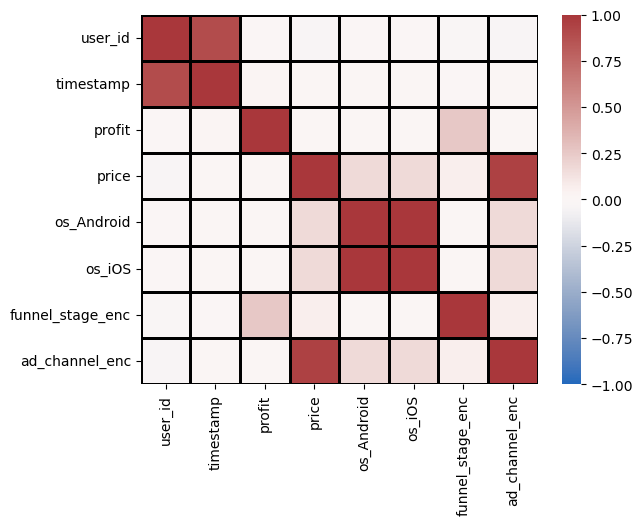

In [78]:
sns.heatmap(df2.corr(), cmap='vlag', linewidths=1, linecolor='black', vmin=-1)

In [79]:
import scipy.stats as st

In [80]:
df2['price'].fillna(df2.price.median(), inplace=True)
df_new['price'].fillna(df_new.price.median(), inplace=True)

In [81]:
st.pearsonr(df2['price'], df2['user_id'], alternative='less')

PearsonRResult(statistic=-0.037672586492366975, pvalue=4.03488380444397e-201)

При аргумента alternative - 'less', я вижу маленький p-value, следовательно я могу принять альтернативнную гипотезу о том что пристуствует обратная корреляция

##Факторный анализ

In [82]:
#!pip install factor_analyzer

In [83]:
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer import calculate_bartlett_sphericity

In [84]:
chi, pvalue = calculate_bartlett_sphericity(df2)
chi, pvalue

C:\Users\Danil\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(inf, 0.0)

P-value получилось нулевым, значит гипотезу о диагональности при стандартном уровне значимости 0,95 мы можем отбросить и считать, что признаки коррелируют между собой.

In [85]:
sc = StandardScaler()
df_sc = sc.fit_transform(df_new)
df_sc

array([[-1.42879968, -1.67977526, -0.04992811, ..., -0.94882908,
         0.86619769,  1.08310464],
       [-1.43820775, -1.67977526, -0.04992811, ..., -0.94882908,
        -0.74962727, -1.72315667],
       [ 1.43459756, -1.67977526, -0.04992811, ..., -0.94882908,
        -0.74962727, -1.32226219],
       ...,
       [ 1.29228826,  3.0970295 , -0.04992811, ..., -0.94882908,
         0.86619769, -0.92136772],
       [ 0.55277147,  3.09785219,  0.63707256, ..., -0.94882908,
         4.0978476 , -0.92136772],
       [-1.3000979 ,  3.11006601, -0.04992811, ...,  1.0539306 ,
        -0.74962727,  0.68221017]])

In [86]:
fa = FactorAnalyzer(n_factors=3)
fa.fit(df_sc)

FactorAnalyzer(rotation_kwargs={})

<Axes: >

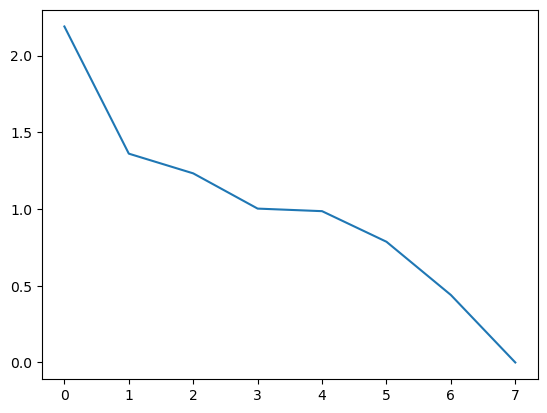

In [87]:
ev, v = fa.get_eigenvalues()
sns.lineplot(data=ev)

In [88]:
sum(ev > 1)

4

In [89]:
fa = FactorAnalyzer(n_factors=4)
fa.fit(df_sc)

FactorAnalyzer(n_factors=4, rotation_kwargs={})

In [90]:
loadings = pd.DataFrame(fa.loadings_, index=df_new.columns, columns=[f'factor_{x}' for x in range(1,5)])
loadings.sort_values(by='factor_3', ascending=False)

,factor_1,factor_2,factor_3,factor_4
funnel_stage_enc,0.002450,-0.007812,0.904975,-0.030682
profit,0.002106,0.004486,0.225644,0.015160
timestamp,-0.001076,-0.000813,0.080971,-0.002154
ad_channel_enc,0.046582,0.752704,0.008145,-0.141468
user_id,0.011824,-0.006019,0.001834,0.505784
os_iOS,-1.000871,-0.001533,0.000810,-0.012638
os_Android,1.000871,0.001533,-0.000810,0.012638
price,-0.051206,0.735884,-0.008891,0.150409


In [91]:
df_tr = pd.DataFrame(fa.transform(df_sc))
df_tr

,0,1,2,3
0,0.958854,0.259370,0.691543,-1.026892
1,0.954766,-1.268428,-0.742066,-0.597980
2,0.927401,0.142113,-0.639229,1.258722
3,-1.050631,0.799401,-0.689706,-0.157795
4,-1.055176,0.799530,0.765322,0.285149
...,...,...,...,...
643689,-1.060718,0.799047,2.297696,0.852980
643690,-1.062728,0.797814,2.306788,1.010957
643691,0.944649,-1.308891,0.819352,0.374636
643692,0.948642,-1.299228,3.705141,0.236907


Для исходного датафрейма было проведено снижение размерности